In [1]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.optimize as opt

import models_fit
import astro_models

import emcee
% matplotlib inline

import inspect

import warnings 
warnings.filterwarnings("ignore")

In [2]:
class orb_params(object):
    # class constructor
    def __init__(self, name='planet', t0=1.97, per=3.19, rp=0.08, 
                 a=7, inc=84.2, ecosw=0.1, esinw=0.1, q1=0.001, q2=0.001, 
                 fp=0.002, A=0.1, B=0.0, C=0.0, D=0.0, r2=0.08, mode=''):
        self.name  = name  
        self.t0    = t0    
        self.per   = per   
        self.rp    = rp    
        self.a     = a     
        self.inc   = inc   
        self.ecosw = ecosw 
        self.esinw = esinw 
        self.q1    = q1    
        self.q2    = q2    
        self.fp    = fp    
        self.A     = A     
        self.B     = B     
        self.C     = C     
        self.D     = D     
        self.r2    = r2    
        self.mode  = mode  
        self.c1    = 1.0
        self.c2    = 0.0
        self.c3    = 0.0
        self.c4    = 0.0
        self.c5    = 0.0
        self.c6    = 0.0
        self.c7    = 0.0
        self.c8    = 0.0
        self.c9    = 0.0
        self.c10   = 0.0
        self.c11   = 0.0
        self.c12   = 0.0
        self.c13   = 0.0
        self.c14   = 0.0
        self.c15   = 0.0
        self.c16   = 0.0
        self.c17   = 0.0
        self.c18   = 0.0
        self.c19   = 0.0
        self.c20   = 0.0
        self.c21   = 0.0

In [16]:
def make_lambdafunc(function, dparams=[], varstr=''):
    '''
    Params:
    -------
    lparams   : list
        list of input all input parameters of the signal function.
    dparams   : list
        list of all input parameters the user does not wish to fit. 
        Default is none.
    obj       : object
        object with all the possible fit parameters values with default 
        values. If the user wish to not fit certain parameters and wants
        to fixed it at a specific value, they will have to assess it to
        the object. Otherwise, default values will be assumed.
    
    Return:
    func .   : function
        lamdba function with parameters fixed to the value oin obj.
    '''
    #print(function)
    lparams = inspect.getargspec(function).args
    # get list of params you wish to fit
    nparams = [sa for sa in lparams if not any(sb in sa for sb in dparams)]
    # assign value to fixed variables
    '''varstr  = ''
    for label in dparams:
        #varstr = 'global ' + label + '; ' +label + ' = obj.' + label
        varstr = label + ' = obj.' + label
        exec(varstr)
        print(varstr)
        print(t0)
    print(t0)'''
    # generate the line to execute
    mystr = 'func = lambda '
    for i in range(len(nparams)):
        mystr = mystr + nparams[i] +', '
    mystr = mystr[:-2]
    mystr = mystr +': function('
    for i in range(len(lparams)):
        mystr = mystr + lparams[i] +', '
    mystr = mystr[:-2]
    mystr = mystr+')'
    print(mystr)
    exec(mystr)
    print(func)
    return func

In [17]:
obj = orb_params()
dparams = ['a', 'rp', 't0']
varstr  = 'a=8; rp=0; t0=3.19'

new = make_lambdafunc(astro_models.ideal_lightcurve, dparams, varstr)

func = lambda time, per, inc, ecosw, esinw, q1, q2, fp, A, B, C, D, r2, mode: function(time, t0, per, rp, a, inc, ecosw, esinw, q1, q2, fp, A, B, C, D, r2, mode)


NameError: name 'func' is not defined

In [19]:
def func(x, a, b, c):
    return a+b*x+c*x**2

In [20]:
c1 = 10
c2 = 3
c3 = 10

xdata = np.linspace(0,1, 100)

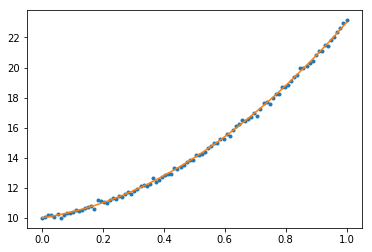

In [21]:
noise = np.random.normal(0, 1e-1, len(xdata))
ydata = func(xdata, c1, c2, c3)


plt.plot(xdata, ydata+noise,'.')
plt.plot(xdata, ydata)

In [22]:
b = 3
popt, pcov = opt.curve_fit(lambda x, a, c:func(x,a,b,c), xdata, ydata+noise)
print(popt)

[ 9.98182624 10.03125724]


In [23]:
lparams = np.array(inspect.getargspec(func).args)

dparams = np.array(['b'])
fixedval= np.array([])
nparams = [sa for sa in lparams if not any(sb in sa for sb in dparams)]

In [24]:
mystr = 'new  = lambda '
for i in range(len(nparams)):
    mystr = mystr + nparams[i] +', '
mystr = mystr[:-2]
mystr = mystr +': func('
for i in range(len(lparams)):
    mystr = mystr + lparams[i] +', '
mystr = mystr[:-2]
mystr = mystr+')'
print(mystr)
exec(mystr)

new  = lambda x, a, c: func(x, a, b, c)


In [30]:
inspect.getargspec(new).args

['x', 'a', 'c']

In [69]:
# Some variable def
r_star            = 1.377              # for XO-3 in solar radius
r_sol2jup         = 0.10049            # jupiter radius in solar radius
r_sol2AU          = 214.93946938       # AU radius in solar radius
hrs2days          = 1/24.0             # hour in days

t0   = 1.97                      # BMJD time
per  = 3.1915239                       # in days
rp   = 0.125/r_star                    # radius (in solar radius)/stellar radius (solar radius) 
a    = 0.0454*r_sol2AU/r_star          # 
inc  = 84.20                           # 90 = edge-on                
ecosw= 0.277*np.cos(np.deg2rad(347.2)) # ecc and w from (Wong et aL. 2014) # np.cos only takes rad
esinw= 0.277*np.sin(np.deg2rad(347.2)) # ecc and w from (Wong et aL. 2014) # np.sin only takes rad
q1   = 0.001
q2   = 0.001
fp   = 0.0015                           # eclipse depth in units of stellar flux

# Phase Variation Parameters (2 params)
A    = 0.1
B    = 0.0

# pre-calculation
mid_x = 15.1
mid_y = 15.2

# photometric scatter
sigmaf = 0.01

In [ ]:
def make_lambdafunc(lparams, dparam=[], obj):
    '''
    Params:
    -------
    lparams   : list
        list of input all input parameters of the signal function.
    dparams   : list
        list of all input parameters the user does not wish to fit. 
        Default is none.
    obj       : object
        object with all the possible fit parameters values with default 
        values. If the user wish to not fit certain parameters and wants
        to fixed it at a specific value, they will have to assess it to
        the object. Otherwise, default values will be assumed.
    
    Return:
    func .   : function
        lamdba function with parameters fixed to the value oin obj.
    '''
    # get list of params you wish to fit
    nparams = [sa for sa in lparams if not any(sb in sa for sb in dparams)]
    # generate the line to execute
    mystr = 'func  = lambda '
    for i in range(len(nparams)):
        mystr = mystr + nparams[i] +', '
    mystr = mystr[:-2]
    mystr = mystr +': func('
    for i in range(len(lparams)):
        mystr = mystr + lparams[i] +', '
    mystr = mystr[:-2]
    mystr = mystr+')'
    exec(mystr)
    return func

In [15]:
ob = orb_params

time = np.linspace(0.4, 4.4, 1000)

astro = astro_models.ideal_lightcurve(time, ob.t0, ob.per, ob.rp, ob.a, ob.inc, 
                                      ob.ecosw, ob.esinw, ob.q1, ob.q2, ob.fp, 
                                      ob.A, ob.B, ob.C, ob.D, ob.r2, ob.mode)

noise = np.random.normal(0, 5e-4, len(astro))
signal = astro + noise

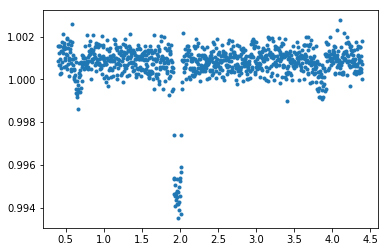

In [16]:
plt.plot(time, signal,'.')

In [ ]:
def get_likefunc(model, fixed):
    
    return

In [84]:
#Log likelihood function
def lnlike(p0, time, flux):
    # unpack p0
    t0, per, rp, a, inc, ecosw, esinw, q1, q2, fp, A, B, flux_err = p0
    # define model
    model = models_fit.phase_curve(time, per, t0, rp, a, inc, ecosw, esinw, q1, q2, fp, A, B)
    inv_sigma2 = 1.0/(flux_err**2)
    return -0.5*(np.sum((flux-model)**2*inv_sigma2) - len(flux)*np.log(inv_sigma2))

# Probability distribution to draw sample from
def lnprior(p0):
    t0, per, rp, a, inc, ecosw, esinw, q1, q2, fp, A, B, flux_err = p0
    if (1.5< t0 < 2.5 and 0 < rp < 1  and 0 < fp < 1 and 
        0 < q1 < 1 and 0 < q2 < 1):
        return 0.0 
    return -np.inf

# Total probability function
def lnprob(p0, time, flux):
    lp = lnprior(p0)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(p0, time, flux)

In [85]:
p0 = np.array([t0, per, rp, a, inc, ecosw, esinw, q1, q2, fp, A, B, sigmaf])

In [86]:
ndim, nwalkers, nstep = len(p0), 2*len(p0), 20 
pos = [p0 + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(time, signal))

In [87]:
pos, lnpro, state, = sampler.run_mcmc(pos, nstep)

In [13]:
x = np.dtype([])

In [ ]:
labs = ['a', 'b', 'c']
vals = [13, 56, 89]

for i in range(len(labs)):
    mystr = '('
    np.append(x, exec())